In [46]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import os
import cmath
from numpy.polynomial import Polynomial
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

# Data Acquisition

In [82]:
dataexp_1 = pd.read_excel(r'c:/Users/nelso/Documents/[Università]/[Laurea Magistrale]/[Primo Anno]/Scientific data acquisition and processing/Data Analysis/Lab_Sc_data_acquisition/Lab_Sc_data_acquisition/01_alluminio_frattale/raw_data/01_alluminio_frattale_raw.xlsx', 'Part I')
dataexp_2 = pd.read_excel(r'c:/Users/nelso/Documents/[Università]/[Laurea Magistrale]/[Primo Anno]/Scientific data acquisition and processing/Data Analysis/Lab_Sc_data_acquisition/Lab_Sc_data_acquisition/01_alluminio_frattale/raw_data/01_alluminio_frattale_raw.xlsx', 'Part II')

lengths =  np.array(dataexp_1['Mean Length'])
mass = np.array(dataexp_1['Mean Mass'])
diameters = np.array(dataexp_2['Mean Diameter'])

Plots Setup

In [22]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 15,
    "font.size": 15,
    "legend.fontsize": 10,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
})

In [58]:
# Power-law function y = k * x^alpha
def power_law(x, k, alpha):
    return k * np.power(x, alpha)

# Part I: Aluminum foil squares 

In [59]:
params, covariance = curve_fit(power_law, lengths, mass)

# Extract the best-fit parameters
k, alpha = params
print(f"Best-fit k: {k}")
print(f"Best-fit alpha: {alpha}")

Best-fit k: 0.003420641660361911
Best-fit alpha: 1.9927575212143376


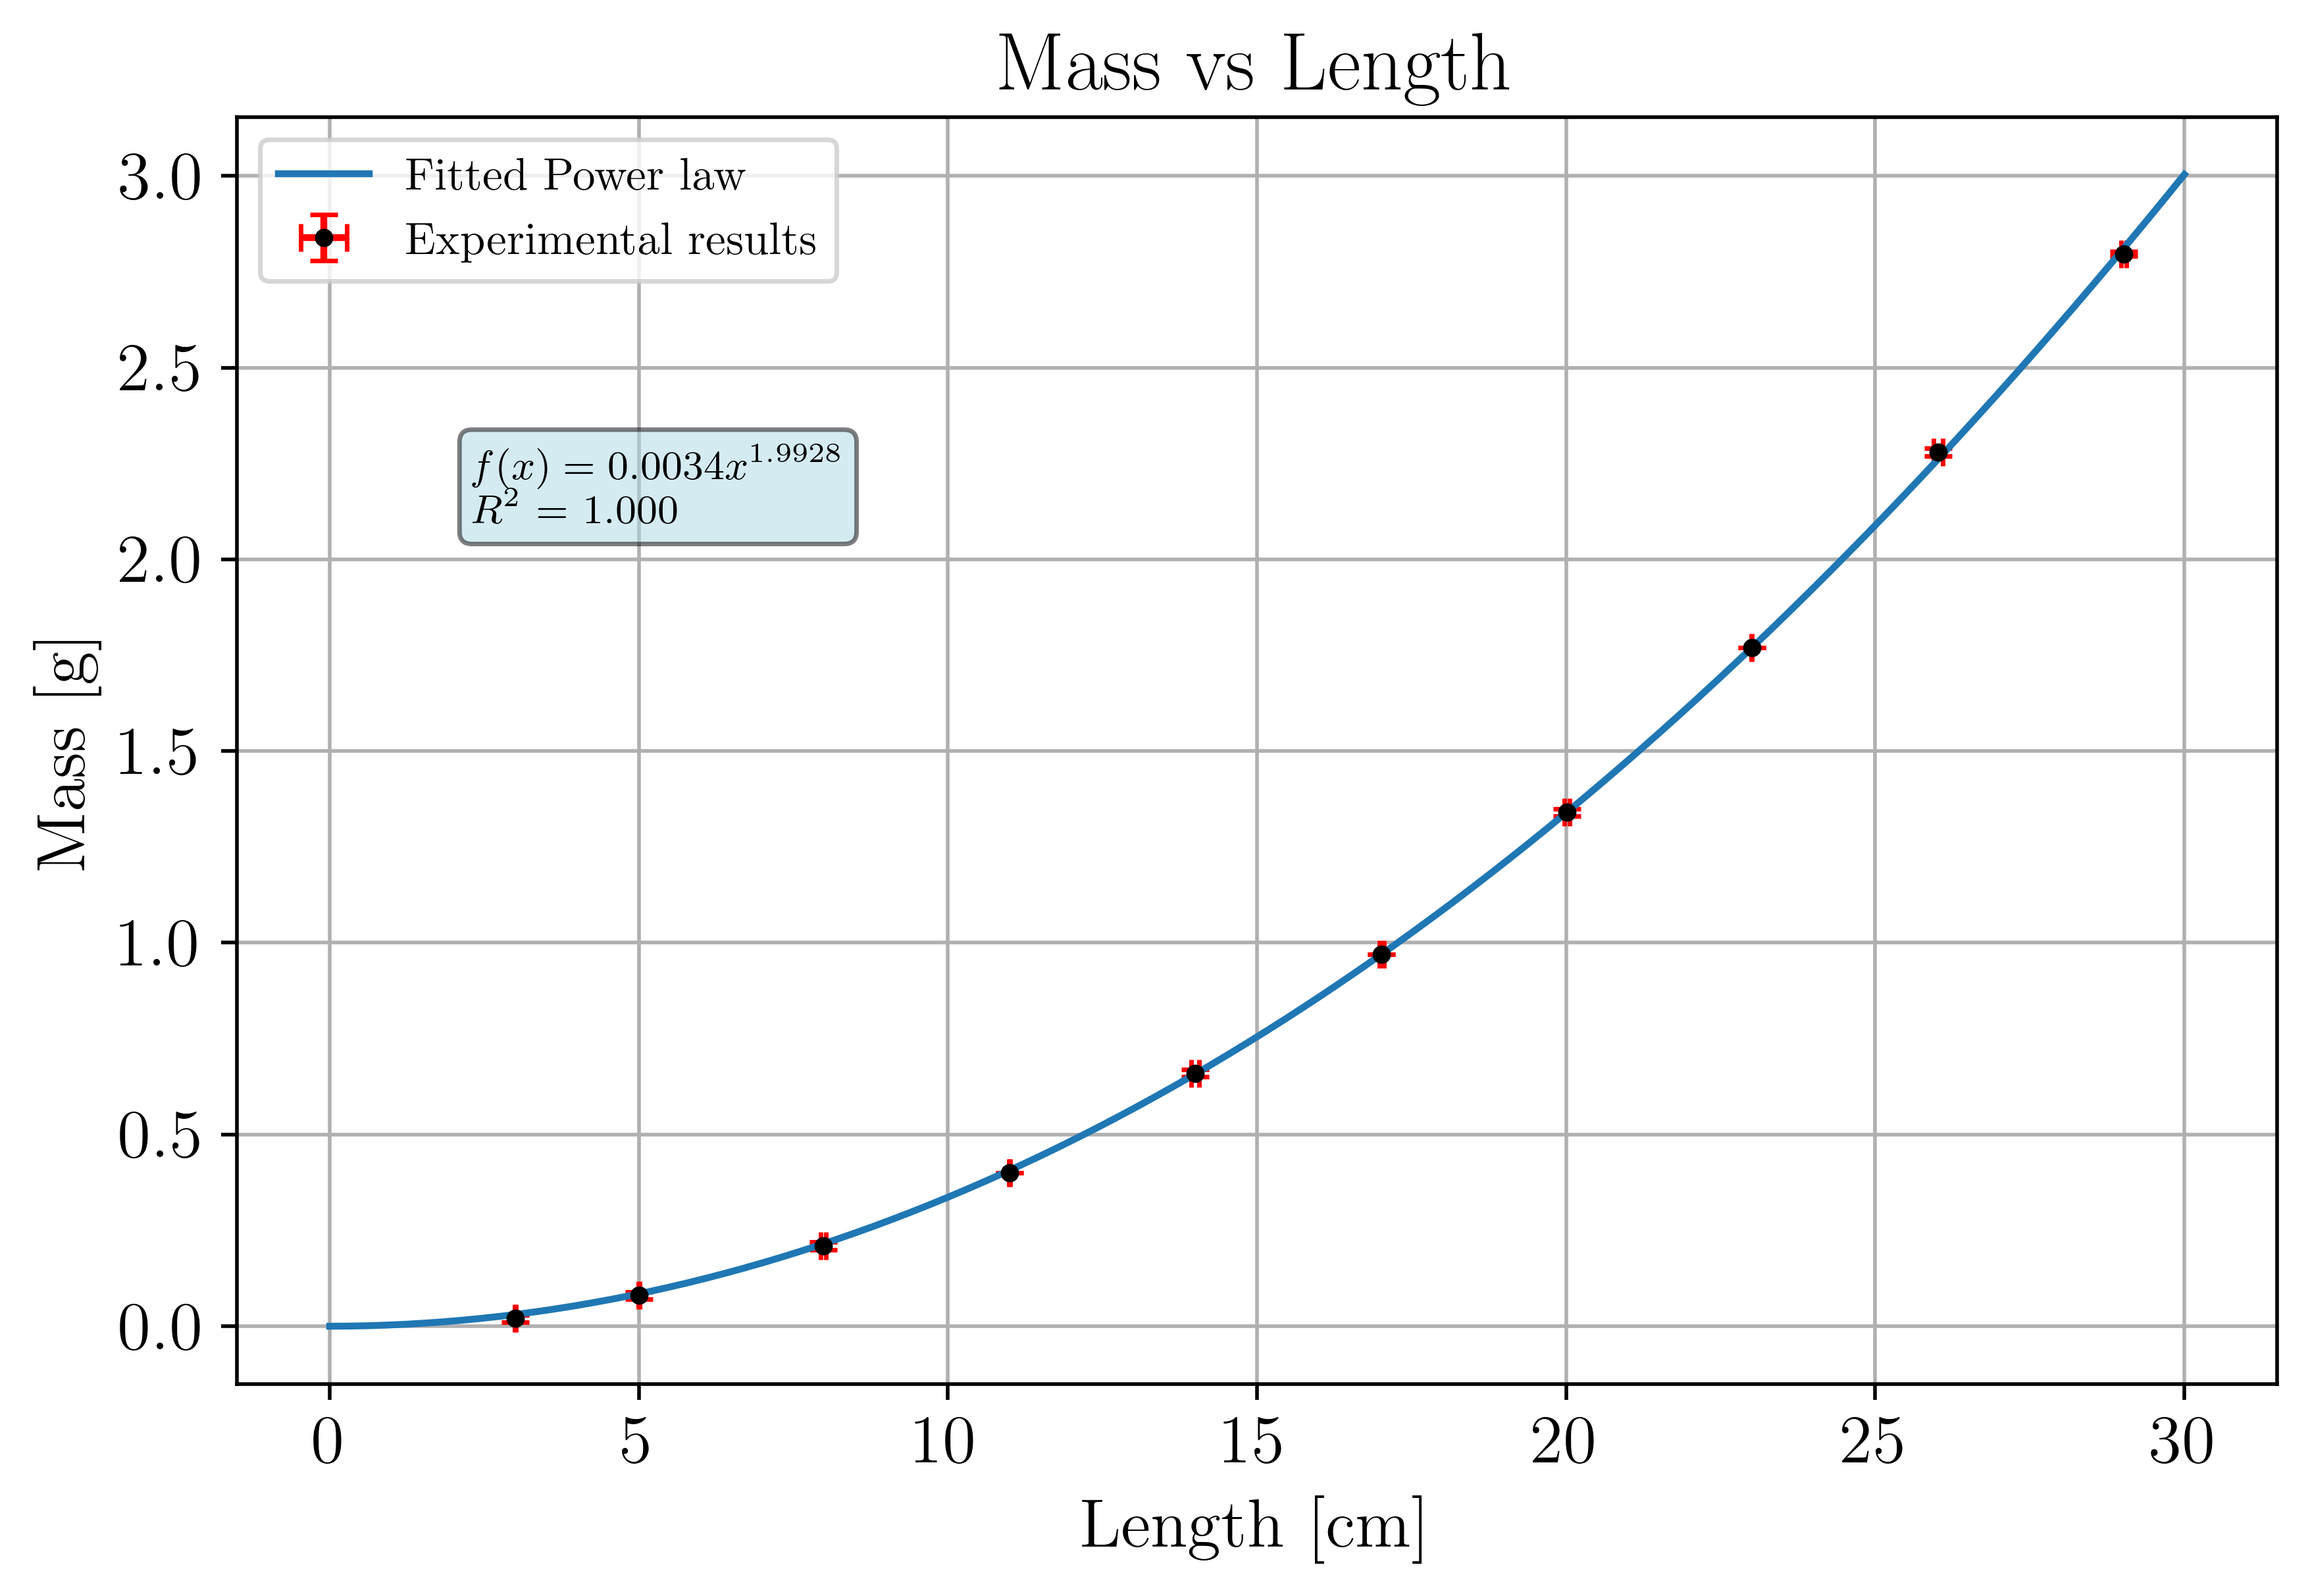

In [71]:
#Power Law fit
x_fit = np.linspace(0, 30, 100)

r_squared = r2_score(mass, power_law(lengths, *params))
equation_str = f"$f(x) = {k:.4f}x^{{{alpha:.4f}}}$"

fig, ax = plt.subplots(figsize=(8, 5), dpi = 500)

ax.errorbar(lengths,mass, xerr = dataexp_1['Error Length'], yerr = dataexp_1['Error Mass'],color = 'black', ecolor = "red",capsize = 3, fmt = '.',  label = 'Experimental results')
ax.plot(x_fit, power_law(x_fit, *params), label='Fitted Power law')

# Enclose the text in a box
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
textstr = f"{equation_str}\n$R^2$ = {r_squared:.3f}"
plt.text(2.3, 2.3, textstr, fontsize=9, verticalalignment='top', bbox=props)

plt.xlabel('Length [cm]')
plt.ylabel('Mass [g]')
plt.title('Mass vs Length')
plt.grid()
plt.legend()
plt.show()

# Linearization I

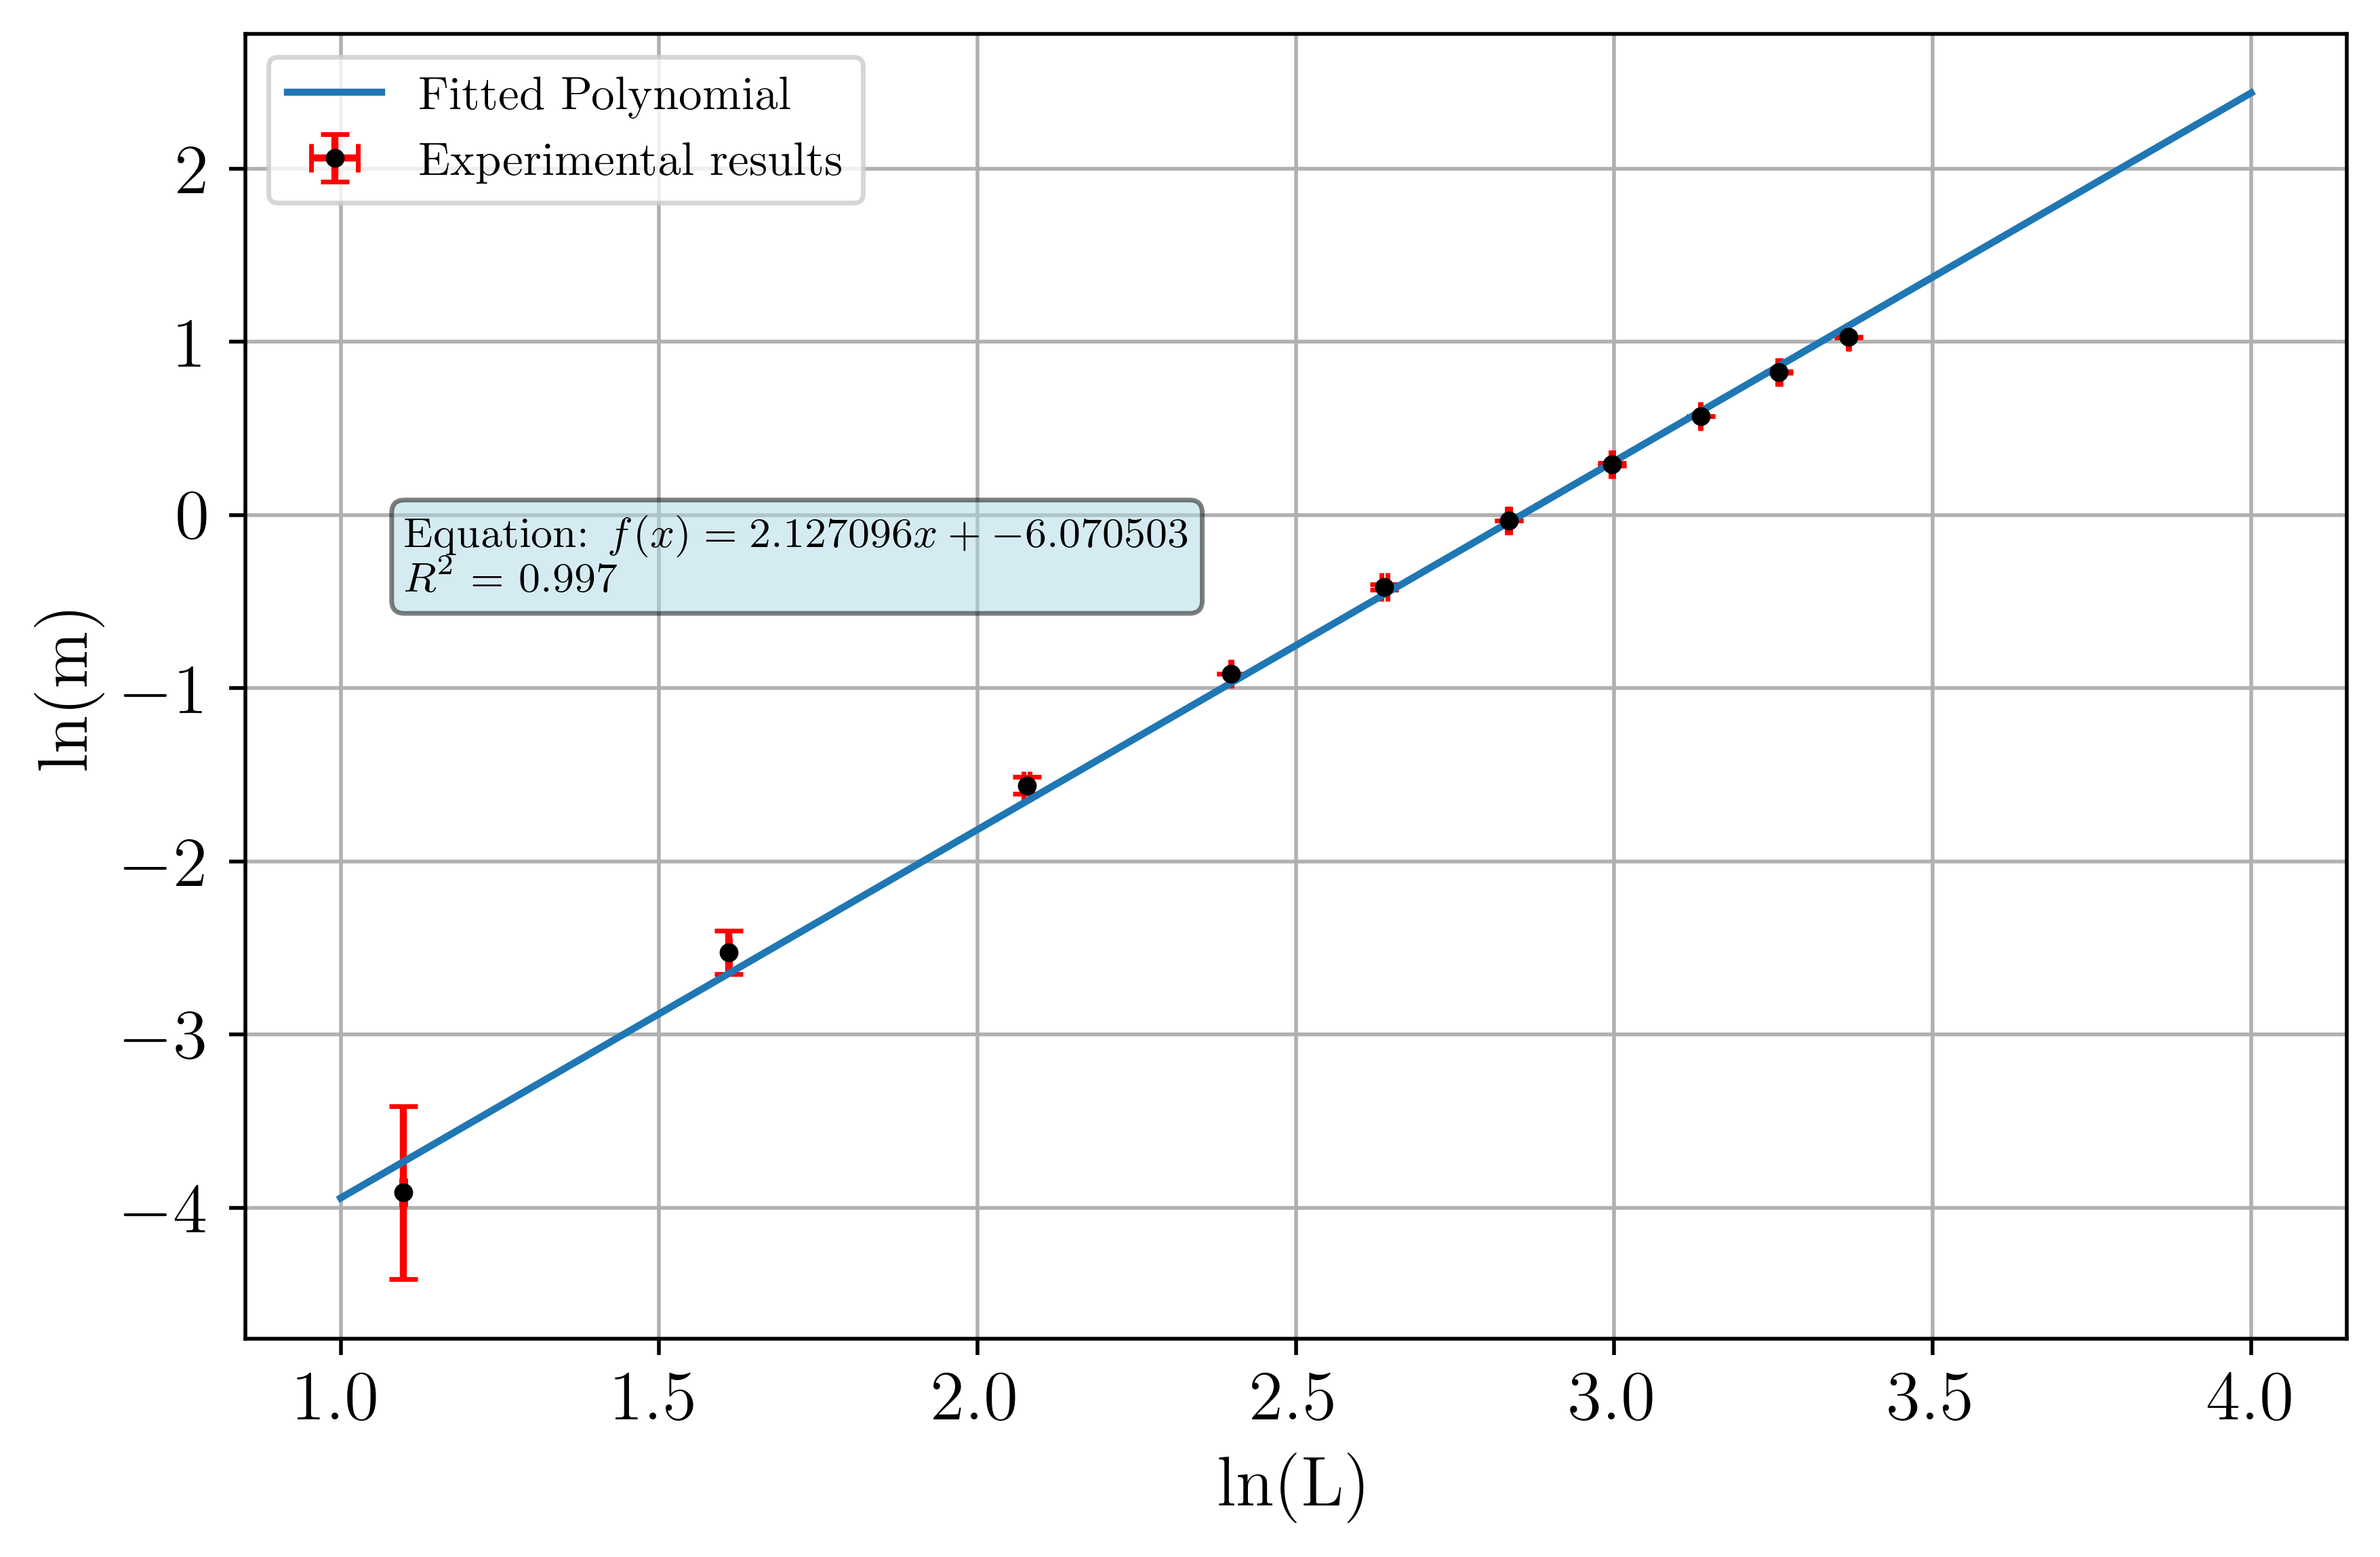

In [83]:
#Power Law fit
coefficients = np.polyfit(np.log(lengths), np.log(mass), 1)
poly_func = np.poly1d(coefficients)
x_fit = np.linspace(1, 4, 100)
y_fit = poly_func(x_fit)

r_squared = r2_score(np.log(mass), poly_func(np.log(lengths)))
equation_str = f"$f(x) = {coefficients[0]:.6f}x + {coefficients[1]:.6f}$"


fig, ax = plt.subplots(figsize=(8, 5), dpi = 500)

ax.errorbar(np.log(lengths),np.log(mass),xerr = dataexp_1['Δln(L)'],yerr= dataexp_1['Δln(m)'], color = 'black', ecolor = "red",capsize = 3, fmt = '.',  label = 'Experimental results')
ax.plot(x_fit, y_fit, label='Fitted Polynomial')

# Enclose the text in a box
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
textstr = f"Equation: {equation_str}\n$R^2$ = {r_squared:.3f}"
plt.text(1.1, 0.0, textstr, fontsize=9, verticalalignment='top', bbox=props)

plt.xlabel('ln(L)')
plt.ylabel('ln(m)')
plt.grid()
plt.legend()
plt.show()

# Part II: Crumpled aluminum squares

In [87]:
# Use curve_fit to find the best-fit parameters k and alpha
params, covariance = curve_fit(power_law, diameters, mass)

# Extract the best-fit parameters
k, alpha = params
print(f"Best-fit k: {k}")
print(f"Best-fit alpha: {alpha}")

Best-fit k: 0.0026072524144540718
Best-fit alpha: 1.9748530968258848


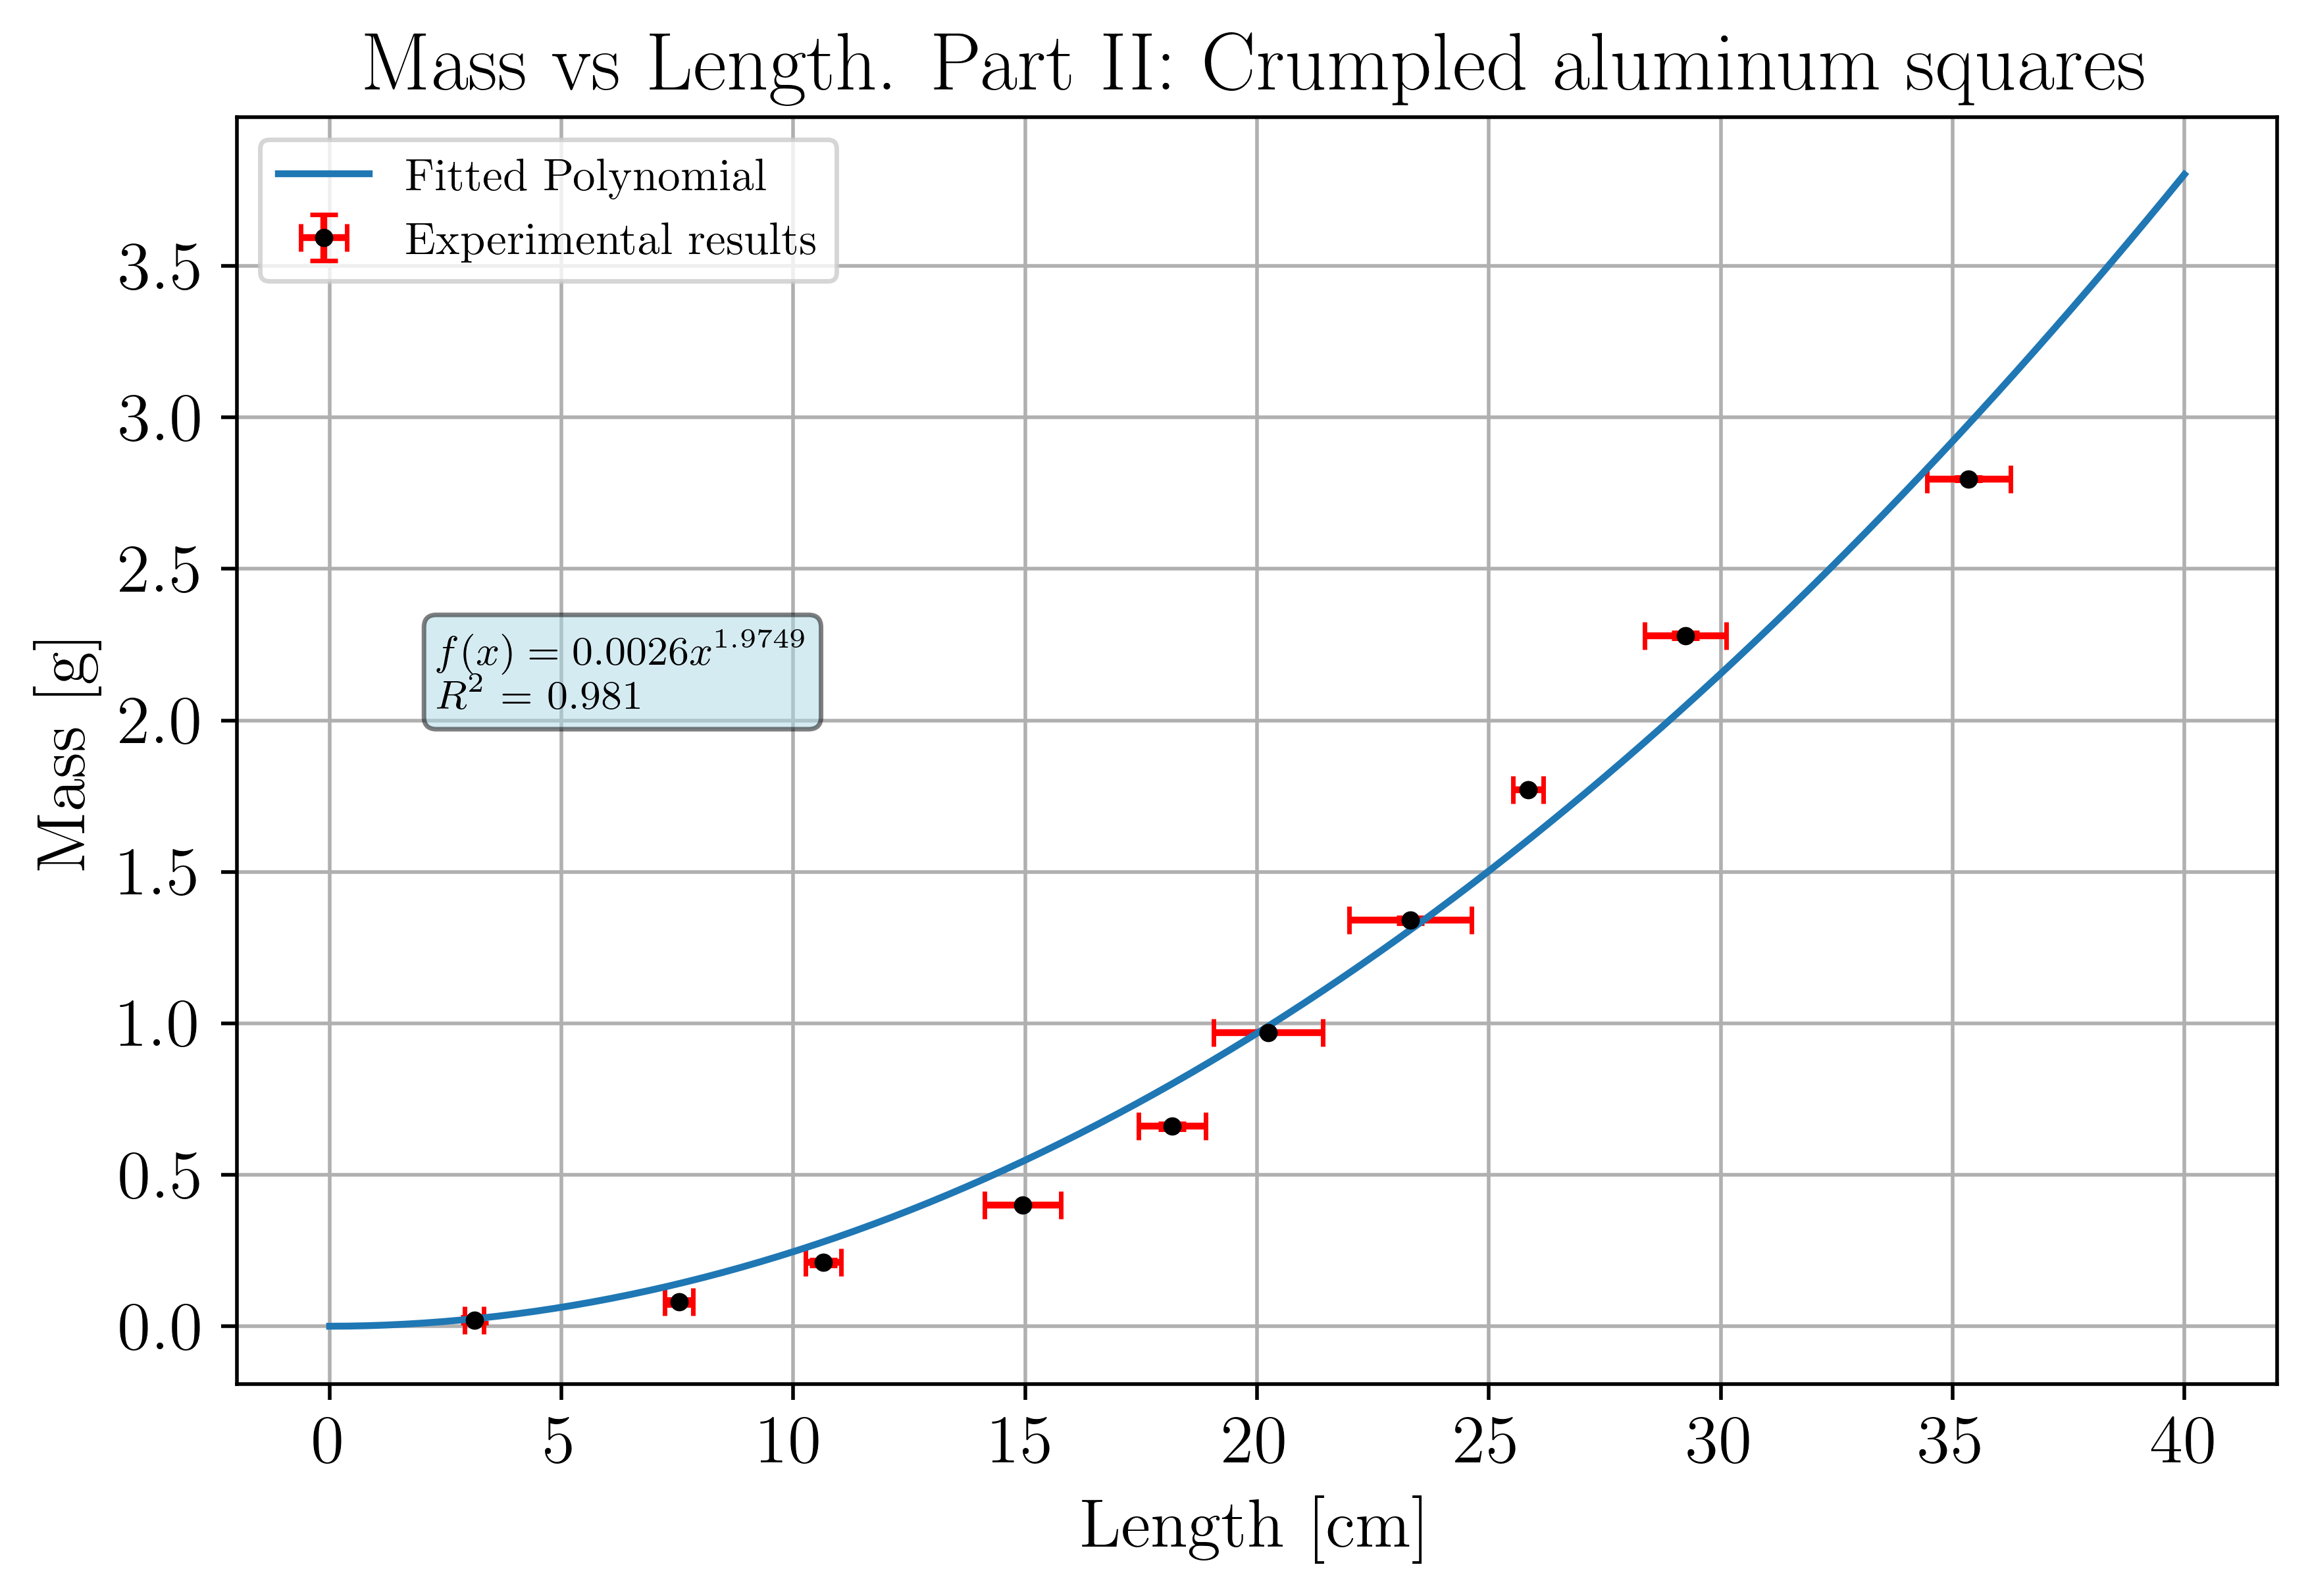

In [88]:
#Power Law fit
x_fit = np.linspace(0, 40, 100)


r_squared = r2_score(mass, power_law(diameters, *params))
equation_str = f"$f(x) = {k:.4f}x^{{{alpha:.4f}}}$"

fig, ax = plt.subplots(figsize=(8, 5), dpi = 500)

ax.errorbar(diameters,mass, xerr = dataexp_2['Error Diameter'], yerr = dataexp_1['Error Mass'],color = 'black', ecolor = "red",capsize = 3, fmt = '.',  label = 'Experimental results')
ax.plot(x_fit, power_law(x_fit, *params), label='Fitted Polynomial')

# Enclose the text in a box
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
textstr = f"{equation_str}\n$R^2$ = {r_squared:.3f}"
plt.text(2.3, 2.3, textstr, fontsize=9, verticalalignment='top', bbox=props)

plt.xlabel('Length [cm]')
plt.ylabel('Mass [g]')
plt.title('Mass vs Length. Part II: Crumpled aluminum squares')
plt.grid()
plt.legend()

plt.show()

# Linearization II

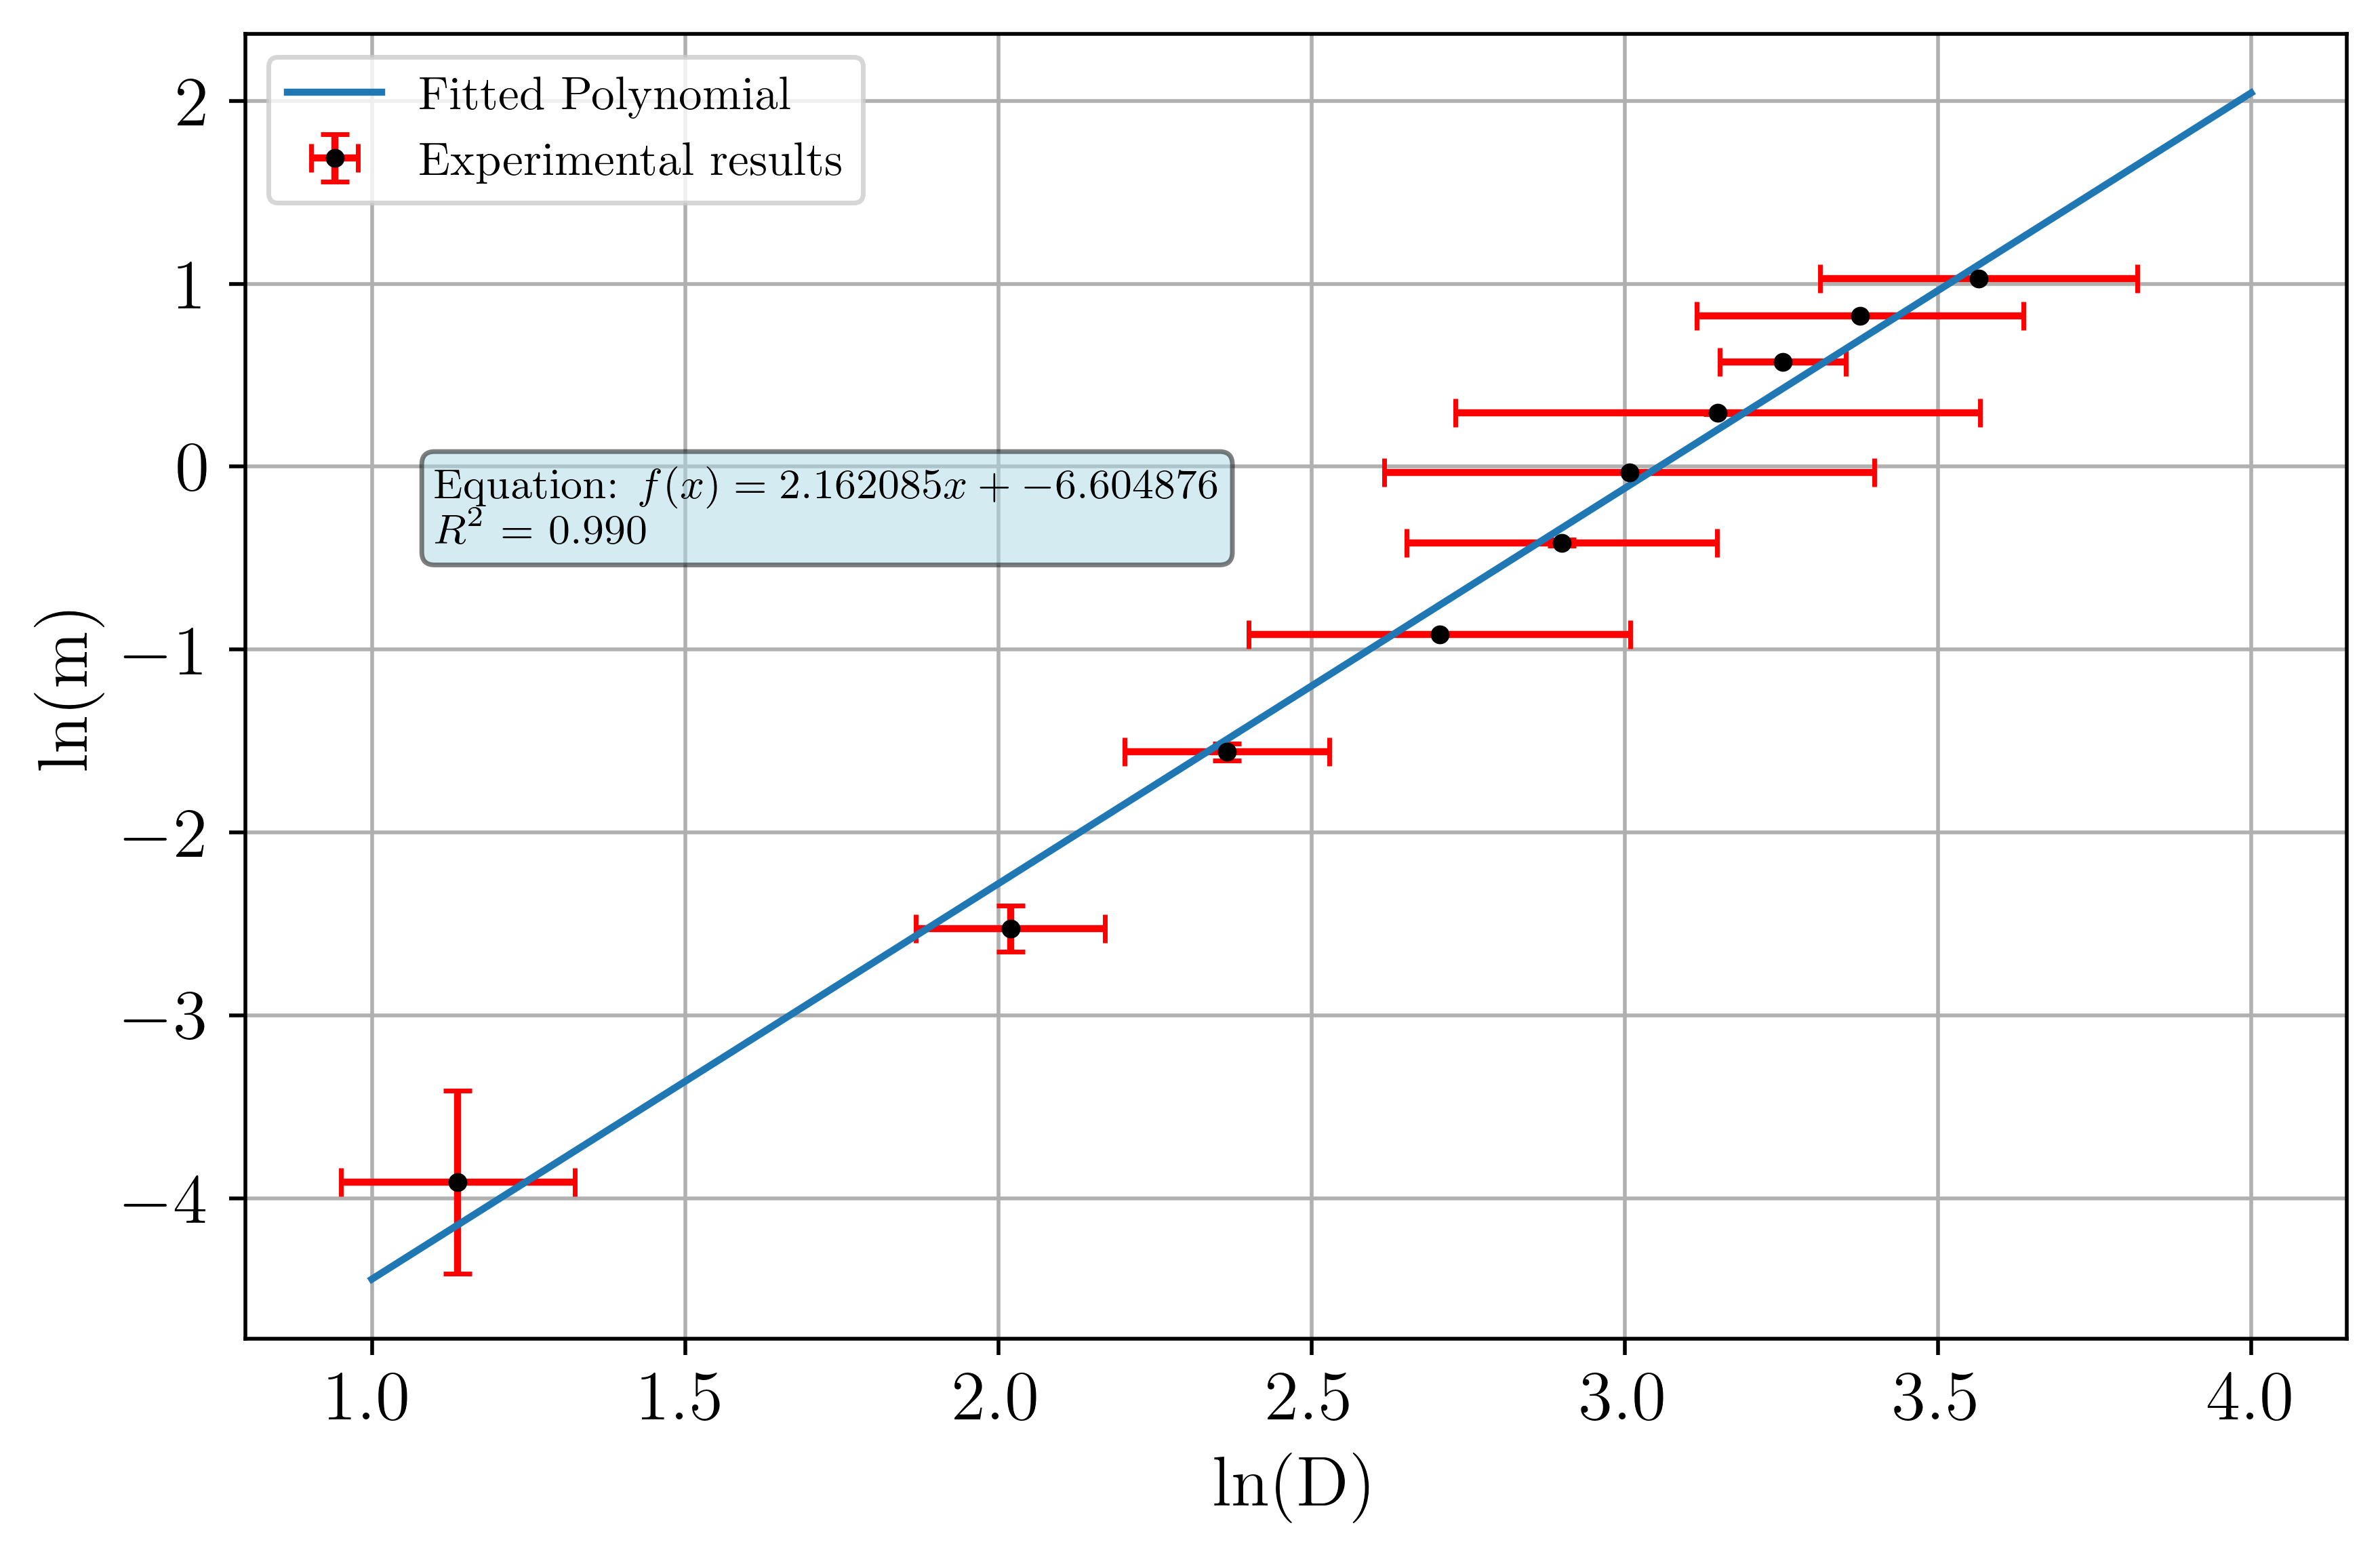

In [86]:
#Power Law fit
coefficients = np.polyfit(np.log(diameters), np.log(mass), 1)
poly_func = np.poly1d(coefficients)
x_fit = np.linspace(1, 4, 100)
y_fit = poly_func(x_fit)

r_squared = r2_score(np.log(mass), poly_func(np.log(diameters)))
equation_str = f"$f(x) = {coefficients[0]:.6f}x + {coefficients[1]:.6f}$"


fig, ax = plt.subplots(figsize=(8, 5), dpi = 500)

ax.errorbar(np.log(diameters),np.log(mass),xerr = dataexp_2['Δln(D)'],yerr= dataexp_1['Δln(m)'], color = 'black', ecolor = "red",capsize = 3, fmt = '.',  label = 'Experimental results')
ax.plot(x_fit, y_fit, label='Fitted Polynomial')

# Enclose the text in a box
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
textstr = f"Equation: {equation_str}\n$R^2$ = {r_squared:.3f}"
plt.text(1.1, 0.0, textstr, fontsize=9, verticalalignment='top', bbox=props)

plt.xlabel('ln(D)')
plt.ylabel('ln(m)')
plt.grid()
plt.legend()
plt.show()